In [108]:
import pandas as pd
import numpy as np
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN

In [4]:
s_df_client = pd.read_csv('./data/s_df_client.csv', index_col = 0) # 서울시 고객정보 불러오기

In [21]:
s_df_client.head()

,고객번호,성별,연령대,거주지역,S_koo
0,1,M,60세이상,60.0,강남구
1,3,M,60세이상,33.0,은평구
2,4,F,60세이상,16.0,노원구
3,7,F,60세이상,36.0,서대문구
4,8,M,60세이상,10.0,강북구


In [5]:
# 고객 구매내역 불러오기
start = time.time()

df_purchase = pd.read_csv('C:/ai/workspace/module_project01/data/02purchaseTR.csv', encoding='CP949')

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 33.106473445892334


In [5]:
df_purchase.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


In [6]:
# 상품정보 불러오기
df_product =  pd.read_csv('C:/ai/workspace/module_project01/data/03product.csv', encoding='CP949')

In [7]:
df_product.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품


In [8]:
df_product['중분류명'].unique()

array(['일용잡화', '육류', '축산가공', '농산물', '수산품', '가공식품', '젓갈/반찬', '건강식품', '주류',
       '차/커피', '기타', '섬유잡화', '액세서리', '화장품', '보석', '준보석/시계', '피혁잡화', '구두',
       '아동', '캐주얼', '커리어', '트래디셔널', '시티웨어', '란제리/내의', '블라우스', '기타의류',
       '디자이너', '모피/피혁', '남성정장', '남성캐주얼', '교복', '셔츠', '남성 트랜디', '스포츠',
       '골프용품', '대형가전', '소형가전', '통신/컴퓨터', '악기', '전자/전기', '주방가전', '명품',
       '주방용품', '문구/팬시', '생활잡화', '식기', '가구', '침구/수예', '웨딩', '열매채소', '버섯',
       '온라인버섯/열매채소', '조리반찬', '시즌반찬', '포장젓갈', '포장반찬', '양곡', '잡곡류', '즉석도정미',
       '가공양곡', '잎채소', '뿌리채소', '버섯류', '샐러드채소', '약초', '양념류', '식자재', '친환경채소',
       '김치채소', '온라인잎/샐러드채소', 'LOCAL잎채소', 'LOCAL김치채소', '샐러드/간편채소', '대중선어',
       '냉동수산물', '생선선물세트', '고등어/삼치', '대구', '도미/민어', '기타구색생선', '꽁치/가자미',
       '오징어', '조기/명태', '국산게/갈치', '선물세트', '즉석구이안주', '마른안주', '멸치건명태', '해조류',
       '특산물', '건오징어', '조미오징어', '육포', '쥐치포', '마른안주선물세트', 'Fast Food',
       '편의시설', '레스토랑', '카페', '판매시설', '주유소', '브랜드조리', '베이커리', '구이', '튀김',
       '밥류', '구이찜조리', '반찬류', '대용식', '이벤트조리', '간식조리', '간편조

In [9]:
df_product['중분류명'].value_counts()

스포츠           79
주방용품          72
문화용품          65
캐주얼           59
전기전자          57
가공식품          55
골프용품          52
의류잡화          38
레저취미          35
남성 트랜디        32
남성캐주얼         30
해물류           27
선어류           27
화장품           27
열매채소          26
액세서리          26
명품            25
수입우육          24
음료            23
청소욕실용품        23
위생용품          23
조미료           22
국산과일          22
버섯류           21
베이커리          21
수산품           20
건과            20
잎채소           19
미용소품          19
잡곡            18
              ..
전자/전기          1
석류             1
믹서기            1
성인침구           1
계절팩            1
영상             1
네일메이크업         1
차선물세트          1
남성스포츠특정        1
클렌징            1
슈즈행사           1
가공양곡           1
온라인버섯/열매채소     1
드럭스토어          1
여성베이직          1
기타음주류          1
전자학습기          1
제습제            1
온라인돼지고기        1
만두             1
온라인해물연체        1
준보석/시계         1
대구             1
스포츠브랜드편집       1
유아동특정          1
수입갈치           1
블라우스           1
온라인양념/뿌리채소    

In [11]:
df_product['중분류코드'].value_counts()

601     114
402     105
1701     69
1706     68
602      64
1703     60
106      59
502      55
501      52
101      47
506      44
401      42
1704     41
503      38
1705     37
105      36
504      35
102      34
801      33
201      32
405      31
202      31
301      30
1702     28
1609     23
303      22
1605     22
403      21
1302     21
901      21
       ... 
4204      1
8006      1
4311      1
5002      1
9204      1
7203      1
1108      1
7603      1
7803      1
1708      1
7907      1
5902      1
4001      1
8802      1
4211      1
6506      1
3904      1
8605      1
4519      1
2504      1
6602      1
2804      1
4903      1
3104      1
5307      1
5311      1
1309      1
1409      1
5903      1
4102      1
Name: 중분류코드, Length: 656, dtype: int64

In [10]:
df_product['대분류코드'].value_counts()

17    306
5     288
6     240
1     236
4     232
3     118
14    117
16    115
2     113
9     104
13    103
26     85
52     80
11     79
45     77
15     76
8      73
7      72
10     69
24     62
12     53
27     53
28     52
68     47
37     47
36     45
79     44
21     44
55     44
43     43
     ... 
82     18
74     18
51     18
72     18
86     18
75     17
31     16
29     16
80     15
73     15
30     14
76     14
47     14
39     14
56     13
48     12
78     12
85     12
57     11
90     11
81     11
71     11
62      9
88      9
83      9
59      6
89      6
61      5
58      4
60      1
Name: 대분류코드, Length: 92, dtype: int64

In [13]:
df_purchase['대분류코드'].value_counts()

1     4461964
3     1983496
15    1750000
5     1408560
14    1366885
10    1337609
4     1165675
11    1128552
7     1046640
12     920455
17     786916
16     782771
6      730739
2      671311
43     657101
9      656908
13     560340
38     551731
8      514490
52     415460
20     410625
74     405876
21     360960
18     237048
91     231782
48     229532
47     202147
19     191066
24     167305
53     165695
       ...   
22      33121
28      29498
61      28548
59      28405
30      23310
76      23138
51      22810
86      22041
77      21980
25      18032
75      17711
23      17562
78      15548
36      13005
71      12295
35      11773
44      11266
70      10850
32      10770
49      10757
50       9029
58       8816
69       8305
88       7810
60       3157
42       1437
41        976
85        554
40        347
39        131
Name: 대분류코드, Length: 92, dtype: int64

# clustering
* 고객의 구매 내역 데이터에서 (구매빈도, 구매시간, 구매금액) 기준으로 clustering 진행
* KMeans, 계층적군집분석, DBSCAN 시도
* KMeans cluster 데이터 분포가 적절하여 해당 방식 이용

In [56]:
# 구매빈도
df_stuff_cnt = df_purchase['소분류코드'].groupby(df_purchase['소분류코드']).count()
# 구매시간
df_stuff_time = df_purchase['구매시간'].groupby(df_purchase['소분류코드']).mean()
# 구매금액
df_stuff_amt = df_purchase['구매금액'].groupby(df_purchase['소분류코드']).mean()

In [62]:
frame1 = { '구매빈도': df_stuff_cnt, '구매시간': df_stuff_time, '구매금액':df_stuff_amt } 

In [83]:
df_stuff = pd.DataFrame(frame1)
df_stuff.head()

,구매빈도,구매시간,구매금액
소분류코드,,,
A010101,101454,15.540748,11597.932166
A010102,720,15.752778,4777.805556
A010103,46517,15.547434,30730.050949
A010104,25080,15.496252,6138.696970
A010105,484,15.254132,220207.851240


### KMeans

In [15]:
feature = df_stuff[ ['구매빈도', '구매시간', '구매금액']]

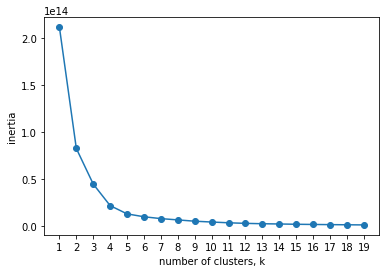

In [30]:
# 적절한 cluster 수 확인 (but 편차때문에 강제로 늘려버림 5 -> 10개)
ks = range(1,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [123]:
# 정규표준화, KMeans, 파이프라인 선언
scaler = StandardScaler()
model = KMeans(n_clusters=10)
pipeline = make_pipeline(scaler,model)

In [124]:
# 파이프라인을 이용하여 정규표준화 한 뒤 KMeans 학습
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

C:\ai\python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ai\python\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ai\python\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [125]:
# clustring 결과의 분포가 적절히 이루어진 것을 확인할 수 있다.
predict['predict'].value_counts()

7    1790
0    1320
4     649
6     264
8     133
2     122
1      47
3      34
9      22
5       5
Name: predict, dtype: int64

In [156]:
# clustring 데이터와 결과값 데이터를 합침
predict = predict.set_index(feature.index)
r = pd.concat([feature,predict],axis=1)
r.head()

,구매빈도,구매시간,구매금액,predict
소분류코드,,,,
A010101,101454,15.540748,11597.932166,1
A010102,720,15.752778,4777.805556,4
A010103,46517,15.547434,30730.050949,6
A010104,25080,15.496252,6138.696970,4
A010105,484,15.254132,220207.851240,4


In [50]:
# KMeans 결과값 저장
r.to_csv('./data/r_KMeans.csv')

In [54]:
pd.read_csv('./data/r_KMeans.csv', index_col='소분류코드').head()

,구매빈도,구매시간,구매금액,predict
소분류코드,,,,
A010101,101454,15.540748,11597.932166,1
A010102,720,15.752778,4777.805556,2
A010103,46517,15.547434,30730.050949,3
A010104,25080,15.496252,6138.696970,3
A010105,484,15.254132,220207.851240,3


In [90]:
df_purchase.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


In [139]:
product_code = df_purchase['소분류코드']
customer_no = df_purchase['고객번호']

In [140]:
frame2 = { '소분류코드': product_code, '고객번호': customer_no} 

In [141]:
pur_product = pd.DataFrame(frame2)
pur_product.head()

,소분류코드,고객번호
0,B150401,17218
1,B160101,17218
2,B160201,17218
3,B180301,17218
4,B050901,17674


In [144]:
# 구매데이터의 소분류코드, 고객번호와 제품데이터의 clustring 결과값을 merge
pur_prod = pd.merge(pur_product, r['predict'].reset_index(), how='left')
pur_prod.head()

,소분류코드,고객번호,predict
0,B150401,17218,6
1,B160101,17218,6
2,B160201,17218,1
3,B180301,17218,7
4,B050901,17674,6


In [146]:
# cluster에 대한 가변수 생성
cluster_dumm = pd.get_dummies(pur_prod['predict'], prefix='cluster')
cluster_dumm.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0


In [147]:
purchase_product = pd.concat([pur_prod,cluster_dumm],axis=1)
purchase_product.head()

,소분류코드,고객번호,predict,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,B150401,17218,6,0,0,0,0,0,0,1,0,0,0
1,B160101,17218,6,0,0,0,0,0,0,1,0,0,0
2,B160201,17218,1,0,1,0,0,0,0,0,0,0,0
3,B180301,17218,7,0,0,0,0,0,0,0,1,0,0
4,B050901,17674,6,0,0,0,0,0,0,1,0,0,0


In [149]:
p_product = pd.concat([purchase_product['고객번호'], purchase_product.iloc[:,3:]], axis=1)
p_product.head()

,고객번호,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,17218,0,0,0,0,0,0,1,0,0,0
1,17218,0,0,0,0,0,0,1,0,0,0
2,17218,0,1,0,0,0,0,0,0,0,0
3,17218,0,0,0,0,0,0,0,1,0,0
4,17674,0,0,0,0,0,0,1,0,0,0


In [151]:
# 고객별 제품cluster 구매 횟수
customer_product_cluster = p_product.groupby(p_product['고객번호']).sum()
customer_product_cluster.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
고객번호,,,,,,,,,,
1,20.0,351.0,39.0,0.0,261.0,0.0,341.0,40.0,0.0,5.0
2,14.0,553.0,21.0,0.0,314.0,0.0,186.0,24.0,0.0,4.0
3,58.0,729.0,0.0,0.0,3.0,0.0,232.0,169.0,0.0,0.0
4,44.0,252.0,5.0,0.0,218.0,0.0,286.0,125.0,0.0,0.0
5,6.0,464.0,2.0,0.0,131.0,0.0,112.0,4.0,0.0,0.0


In [152]:
# 고객별 제품cluster csv파일로 저장
customer_product_cluster.to_csv('./data/cust_KMeans.csv')

In [154]:
df_abc = pd.read_csv('./data/cust_KMeans.csv', index_col = '고객번호')
df_abc.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
고객번호,,,,,,,,,,
1,20.0,351.0,39.0,0.0,261.0,0.0,341.0,40.0,0.0,5.0
2,14.0,553.0,21.0,0.0,314.0,0.0,186.0,24.0,0.0,4.0
3,58.0,729.0,0.0,0.0,3.0,0.0,232.0,169.0,0.0,0.0
4,44.0,252.0,5.0,0.0,218.0,0.0,286.0,125.0,0.0,0.0
5,6.0,464.0,2.0,0.0,131.0,0.0,112.0,4.0,0.0,0.0


# 여기 밑은 나중에 해볼꺼!!!!

### 계층적군집분석

In [13]:
mergings = linkage(df_stuff,method='average') # average

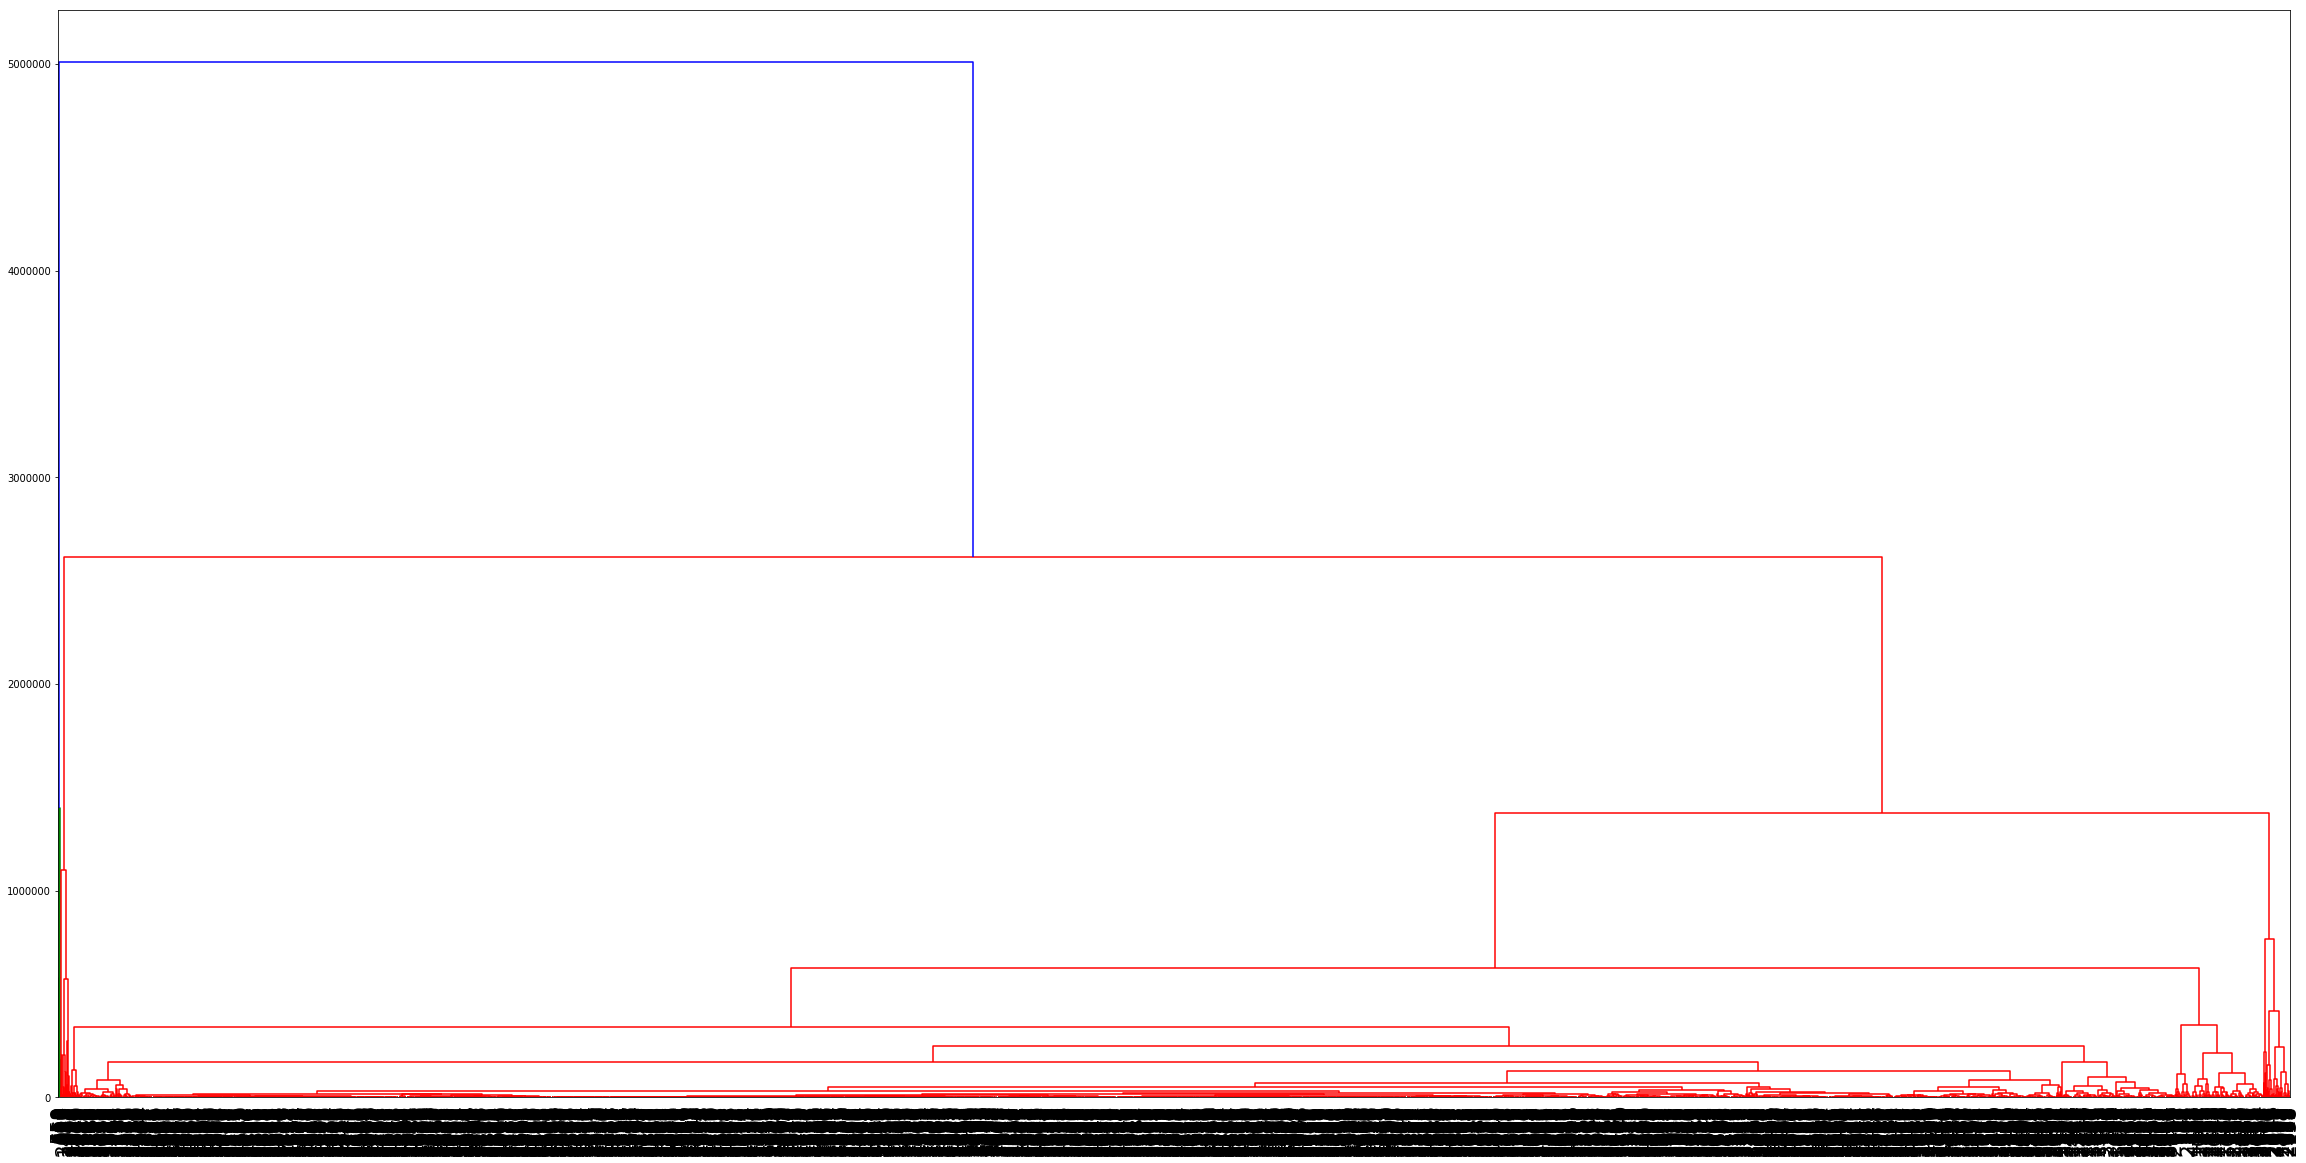

In [57]:
# 덴드로그램으로 표시
plt.figure(figsize=(40,20))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [14]:
predict = pd.DataFrame(fcluster(mergings,10,criterion='distance'))
predict.columns=['predict']

### DBSCAN

In [28]:
feature = df_stuff[ ['구매빈도','구매시간','구매금액']]

In [29]:
# create DBSCAN model and prediction
model = DBSCAN(min_samples=3)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

In [30]:
predict['predict'].value_counts()

-1    4386
Name: predict, dtype: int64

In [33]:
r = pd.concat([feature,predict],axis=1)

In [ ]:
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 100, 100], elev=48, azim=134)
ax.scatter(r['구매빈도'],r['구매시간'],r['구매금액'],c=r['predict'],alpha=0.5)
ax.set_xlabel('구매빈도')
ax.set_ylabel('구매시간')
ax.set_zlabel('구매금액')
plt.show()